In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_long_salary_18-19')

In [3]:
rbs.dtypes

NAME          object
LONG           int64
LONG_rank    float64
salary         int64
dtype: object

In [4]:
rbs.head()

,NAME,LONG,LONG_rank,salary
0,Derrick Henry,99,1.0,1351982
1,Lamar Miller,97,2.0,6500000
2,Nick Chubb,92,3.0,1845774
3,Adrian Peterson,90,4.0,1015000
4,Saquon Barkley,78,5.0,7798688


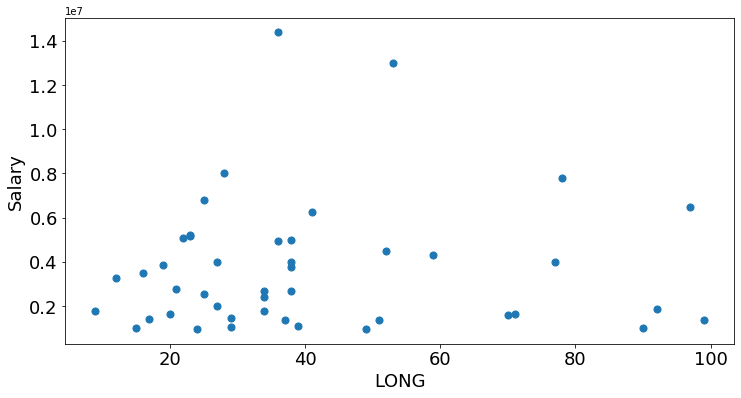

In [5]:
ax = rbs.plot(kind="scatter", x = 'LONG',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('LONG', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['LONG', 'salary']])

In [7]:
X.mean(axis = 0)

array([4.03717464e-17, 3.02788098e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.55597281, -0.58190599],
       [ 1.97663975,  1.19332173],
       [ 0.15943741,  3.43833696],
       [ 1.79351083, -0.60760652],
       [-0.25829157,  0.50787289]])

In [11]:
km.predict(X)

array([3, 1, 3, 3, 1, 3, 3, 3, 4, 2, 4, 0, 0, 4, 0, 4, 4, 4, 0, 0, 4, 2,
       0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,LONG,LONG_rank,salary,clusters
0,Derrick Henry,99,1.0,1351982,3
1,Lamar Miller,97,2.0,6500000,1
2,Nick Chubb,92,3.0,1845774,3
3,Adrian Peterson,90,4.0,1015000,3
4,Saquon Barkley,78,5.0,7798688,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.75714286e+01, 1.97934981e+06],
       [8.75000000e+01, 7.14934400e+06],
       [4.45000000e+01, 1.36875000e+07],
       [8.31666667e+01, 1.90450217e+06],
       [3.46153846e+01, 5.15311192e+06]])

In [14]:
rbs.groupby('clusters')[['LONG', 'salary']].mean()

,LONG,salary
clusters,,
0,27.571429,1.979350e+06
1,87.500000,7.149344e+06
2,44.500000,1.368750e+07
3,83.166667,1.904502e+06
4,34.615385,5.153112e+06


In [15]:
centroids = rbs.groupby('clusters')[['LONG', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

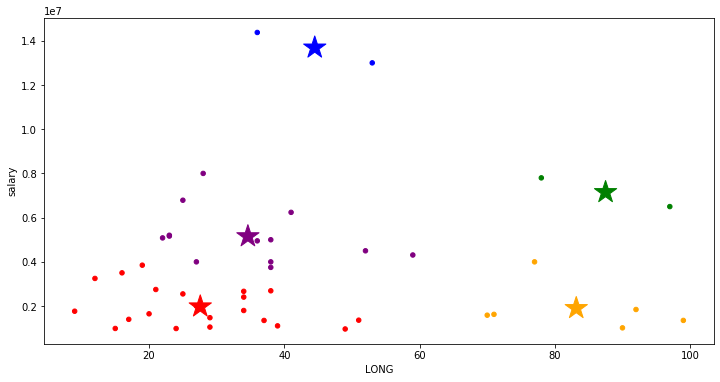

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'LONG', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'LONG', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

14.304824271484788

In [18]:
silhouette_score(X, km.labels_)

0.4407710987932268